--- N=50
A1 = 1.46, f1 = 16.05
A2 = 0.30, f2 = 18.50
--- N=200
A1 = 1.40, f1 = 15.93
A2 = 0.67, f2 = 17.08


/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_2815/2714041668.py:73: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


--- N=1000
A1 = 1.40, f1 = 16.00
A2 = 0.60, f2 = 17.00


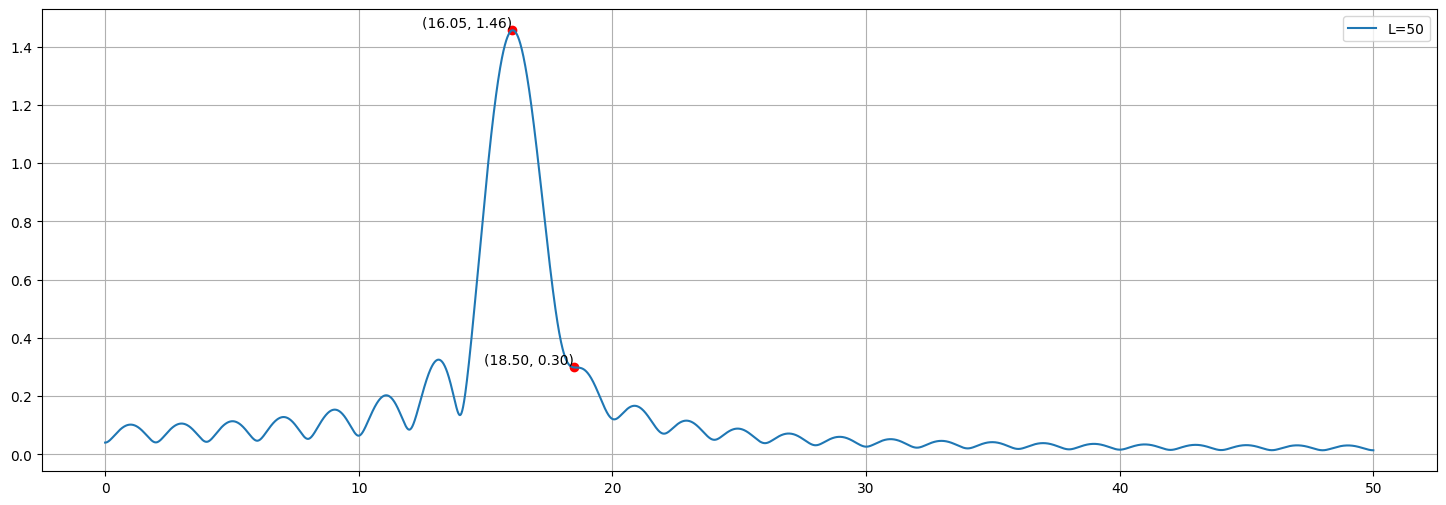

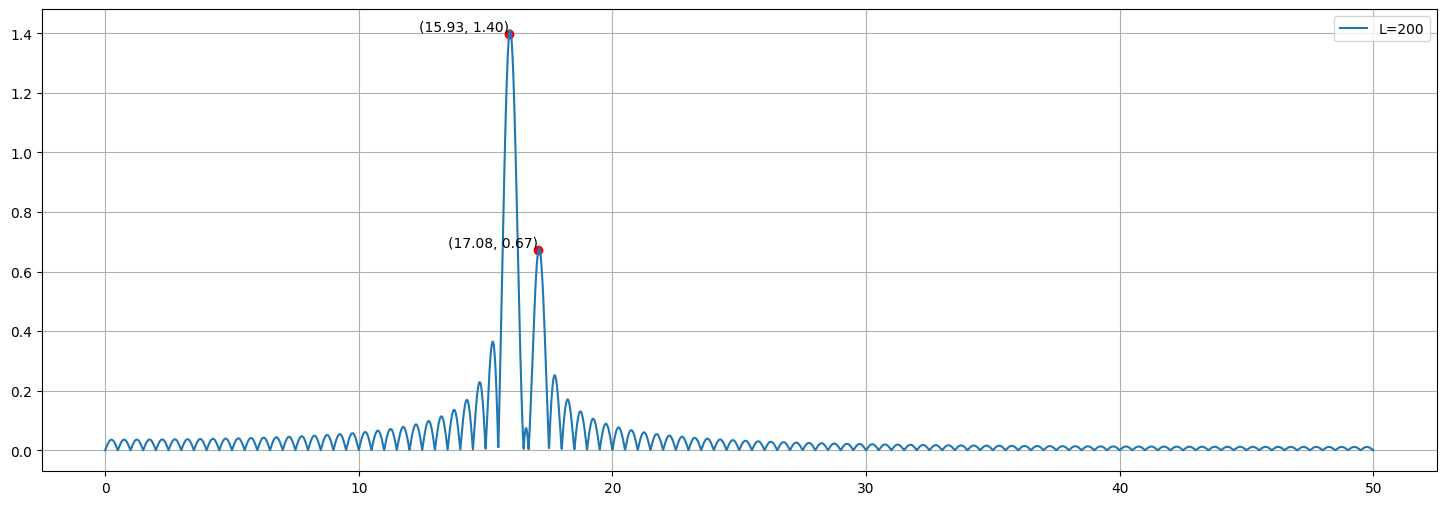

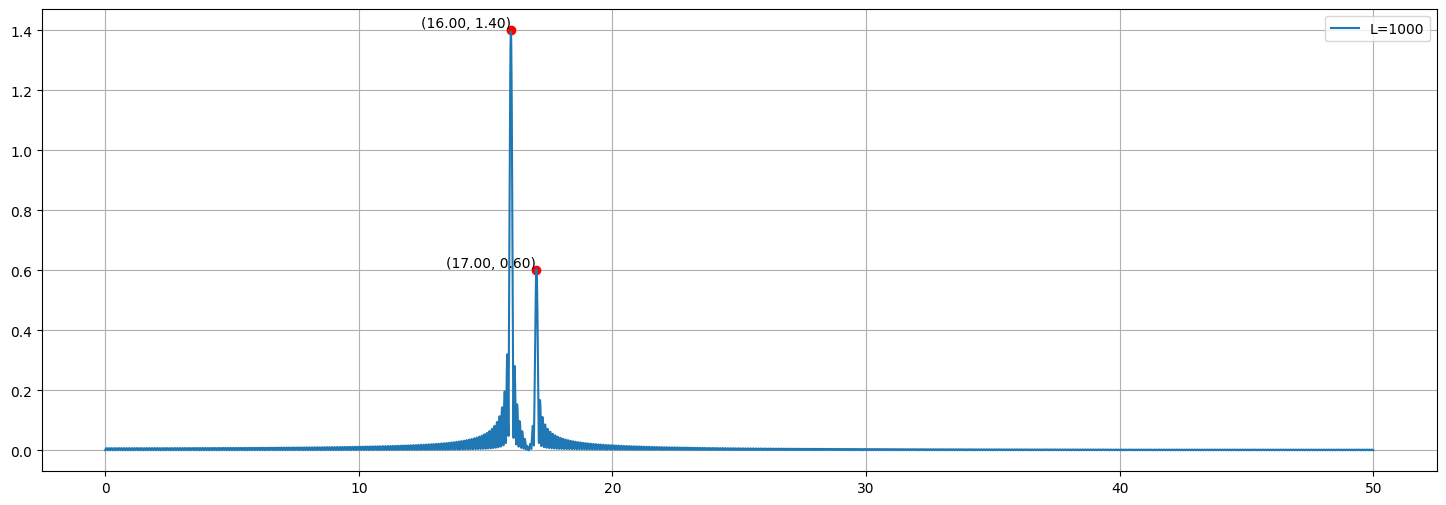

In [47]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLING_T = 0.01
F_S = 100
F1 = 16
A1 = 1.4
DELTA_F = 1
F2 = F1 + DELTA_F
A2 = 0.6

NUM_W = 5000
W_S = 2 * np.pi * F_S

def func_x(t):
    # t = n * SAMPLING_T
    return A1 * np.sin(2 * np.pi * F1 * t) + A2 * np.sin(2 * np.pi * F2 * t)

def DTFT(nT, xn, w):
    Xw = np.zeros(len(w), dtype=complex)
    for i, wi in enumerate(w):
        # Only at t = nT[i], there is xn[i] * delta
        Xw[i] = np.sum(xn * np.exp(-1j * wi * nT))
    return Xw

def dtft_single_point(f, w, length):
    w_vec = np.array([w])
    ns = np.arange(length)
    ts = ns * SAMPLING_T
    fs = f(ts)
    return DTFT(ts, fs, w_vec)[0]

def dtft_of_func_half_nyquist(f, length):
    # The period (Nyquist interval) is ws (the sampling frequency)
    # s and t in the time domain
    sampling_angular_frequency = W_S
    w_vec = np.linspace(0, +sampling_angular_frequency / 2, NUM_W)
    ns = np.arange(length)
    ts = ns * SAMPLING_T
    fs = f(ts)
    return w_vec, DTFT(ts, fs, w_vec)

def compress_x_axis(opt, w_vec, omega_sampling):
    if opt == 0: # [w] -> [f]
        return w_vec / (2 * np.pi)
    f_sampling = omega_sampling / (2 * np.pi)
    if opt == 1: # [f / fs]
        return w_vec / (2 * np.pi) / f_sampling
    if opt == 2: # [w / fs]
        return w_vec / f_sampling

ls = [50, 200, 1000]
draw_fs = [
    [16.05, 18.5],
    [15.93, 17.08],
    [16.00, 17],
]
for i, length in enumerate(ls):
    w_vec, dtft = dtft_of_func_half_nyquist(func_x, length)
    fs = compress_x_axis(0, w_vec, W_S)
    fig = plt.figure(figsize=(18, 6))
    print(f'--- N={length}')
    for j in range(2):
        f1 = draw_fs[i][j]
        w1 = f1 * 2 * np.pi
        y1 = np.abs(dtft_single_point(func_x, w1, length)) * 2 / length
        print(f'A{j + 1} = {y1:.2f}, f{j + 1} = {f1:.2f}')
        plt.plot(f1, y1, 'ro')  # 'ro'表示红色圆点
        plt.text(f1, y1, f'({f1:.2f}, {y1:.2f})', ha='right', va='bottom')  # 标注坐标
    plt.plot(fs, np.abs(dtft) * 2 / length, label=f'L={length}')
    plt.grid(True)
    plt.legend()
    fig.show()

--- N=50
A1 = 1.48, f1 = 16.08
A2 = 0.53, f2 = 18.50
--- N=200
A1 = 1.39, f1 = 15.97


/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_2815/1319707619.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


A2 = 0.64, f2 = 16.80
--- N=1000
A1 = 1.40, f1 = 16.00
A2 = 0.60, f2 = 17.00


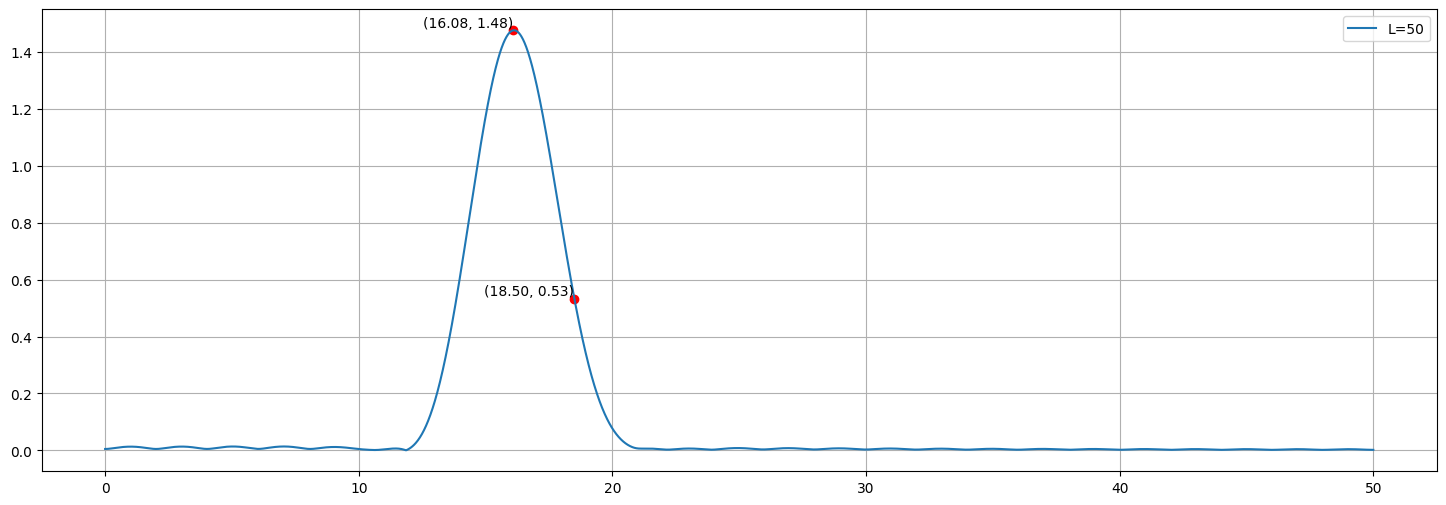

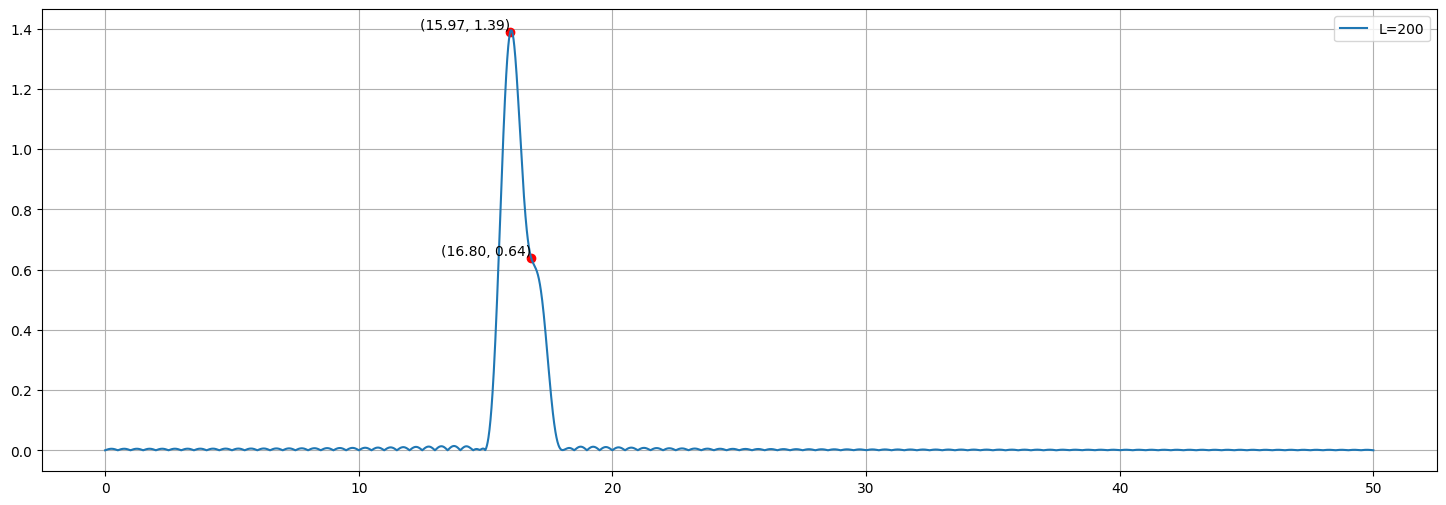

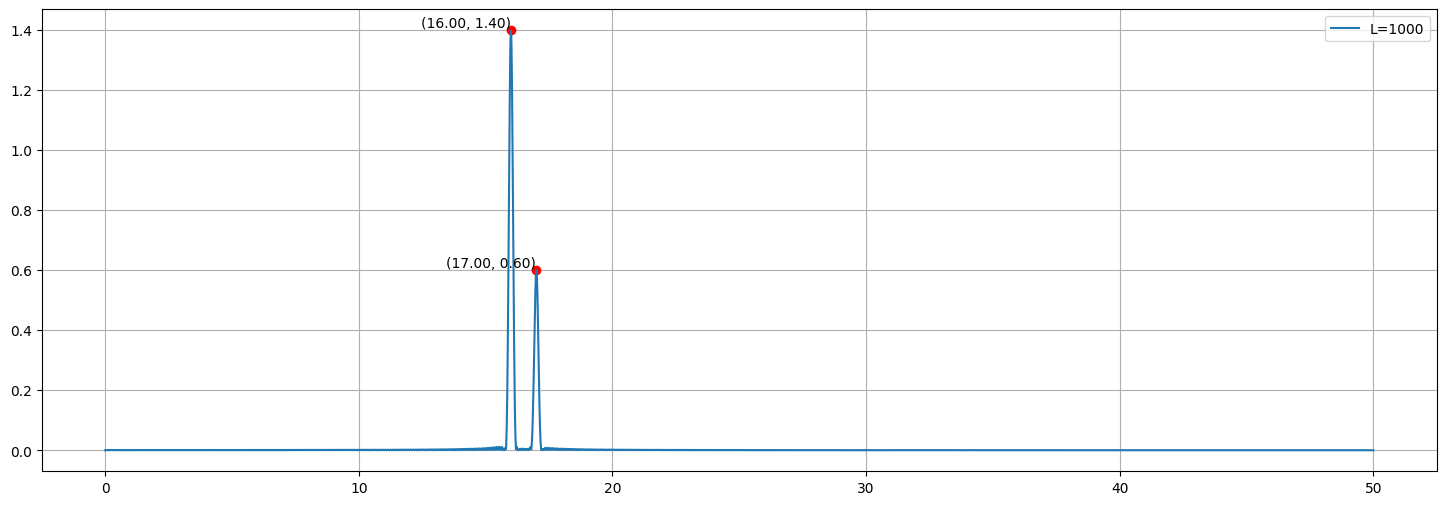

In [48]:
A0 = 0.53836
def hamming(n, N):
    return A0 - (1 - A0) * np.cos(2 * np.pi * n / (N - 1))

def dtft_of_func_half_nyquist_hamming(f, length):
    # The period (Nyquist interval) is ws (the sampling frequency)
    # s and t in the time domain
    sampling_angular_frequency = W_S
    w_vec = np.linspace(0, +sampling_angular_frequency / 2, NUM_W)
    ns = np.arange(length)
    ts = ns * SAMPLING_T
    fs = f(ts)
    for i in range(length):
        fs[i] *= hamming(i, length)
    return w_vec, DTFT(ts, fs, w_vec)

def dtft_single_point_hamming(f, w, length):
    w_vec = np.array([w])
    ns = np.arange(length)
    ts = ns * SAMPLING_T
    fs = f(ts)
    for i in range(length):
        fs[i] *= hamming(i, length)
    return DTFT(ts, fs, w_vec)[0]

ls = [50, 200, 1000]
draw_fs = [
    [16.08, 18.5],
    [15.97, 16.8],
    [16.00, 17],
]
for i, length in enumerate(ls):
    w_vec, dtft = dtft_of_func_half_nyquist_hamming(func_x, length)
    fs = compress_x_axis(0, w_vec, W_S)
    fig = plt.figure(figsize=(18, 6))
    print(f'--- N={length}')
    for j in range(2):
        f1 = draw_fs[i][j]
        w1 = f1 * 2 * np.pi
        y1 = np.abs(dtft_single_point_hamming(func_x, w1, length)) * 2 / length / A0
        print(f'A{j + 1} = {y1:.2f}, f{j + 1} = {f1:.2f}')
        plt.plot(f1, y1, 'ro')  # 'ro'表示红色圆点
        plt.text(f1, y1, f'({f1:.2f}, {y1:.2f})', ha='right', va='bottom')  # 标注坐标
    plt.plot(fs, np.abs(dtft) * 2 / length / A0, label=f'L={length}')
    plt.grid(True)
    plt.legend()
    fig.show()
